# Webscraping Capstone Project - Scraping a Flipkart product

### Submitted By - Bhanumathi Ramesh

#### The following steps are carried out in this project
    1. Web scraping for a procut on www.flipkart.com 
       - Procut considered for scraping - Washing machine 
    2. Product Specification of (Feature extraction) the product
       - Following features are extracted :
           description             : Description about the product
           price                   : Price of the washing machine
           rating                  : Rating given by the buyers
           In The Box              : Details about what comes in the package
           Brand                   : Brand Name
           Model Name              : Model Name
           Function Type           : Function Type - Fully Automatic, Semi Automatic, Front Load, Top Load
           Energy Rating           : Energy rating of the macine
           Washing Capacity        : Capacity in Kgs, 5kg, 6kg, 10 kgs etc
           Washing Method          : Tumble,Pulsator etc
           Maximum Spin Speed      : Categorical value, 
           In-built Heater         : Categorical value, Yes/No
           Colour                  : Different shades available
           Shade                   : Different shades of color
           Water Level Selector    : Categorical values, Yes/No
           Technology Used         : Categorical value, Digital Inverter etc
           Water Level Settings    : Categorical values, Yes/No
           Dryer Type              : categorical Values, Air Dry, Spin dry etc.
           Water Consumption       : Numerical values, water consumption in liter
           Dryer Capacity          : Numerical values in minutes
           Wash Cycle Duration     : Numerical values in minutes
           Spin Cycle Duration     : Numerical values in Minutes
           Maximum Temperature     : Numerical values in Degrees
     3. Data Cleaning and Exploratory Data Analysis on the Product Specifications
     4. Data Visualization on the processed data.               

# 1. Scraping Washing Machine from ww.flipkart.com

In [595]:
# import dependancies
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns


In [591]:
#flipkart_url = "https://www.flipkart.com/search?q=" + serachString
flipkart_url = "https://www.flipkart.com/search?q=washingmachine&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="


In [592]:
flipkart_url

'https://www.flipkart.com/search?q=washingmachine&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

In [5]:
## Gt the html page handler

def getthehtmlpage(flipkart_url):
    try:
        flipkart_page = requests.get(flipkart_url)
    except:
        print("Bad Gate way - 502 error!!")
        
    return bs(flipkart_page.content,'html.parser')

In [6]:
# Get the number of pages
def getNoOfPages(flipkart_html):
    noOfResults = flipkart_html.find(class_= '_2MImiq')
    getnoOfpages = noOfResults.span.text.split(" ")
    noOfPages = int(getnoOfpages[3])
    return noOfPages

In [7]:
def scrapeWashineMachine(df,flipkart_url,noOfPages = 1):
    
    
    flipkart_html = getthehtmlpage(flipkart_url)
    totalPages = getNoOfPages(flipkart_html)
    
    if totalPages < noOfPages :
        return "Please enter pages less than {}".format(totalPages)    
    
    for page in range(1,noOfPages+1):
        # visit each page by appending page number in the url
        flipkart_url_new = flipkart_url + str(page)
        print("Scraping Page no = ", page)
        # request the url, response whoulc be 200 for succefull hit
        flipkart_page = requests.get(flipkart_url_new)    
        flipkart_pages_url = bs(flipkart_page.content,'html.parser')
        # serach results, each product containers
        mainBox = flipkart_pages_url.find_all("div", {"class" : "_1AtVbE col-12-12"})
        del mainBox[0:2]
        i = j = 0
        for i in range(0,24):
            productlink = "https://www.flipkart.com" + mainBox[i].div.div.div.a['href']
            eachprodlink = requests.get(productlink)
            #time.sleep(5)
            productUrl = bs(eachprodlink.content, "html.parser")
            j = j+1
            print("item no = ", j)
            # Brands
            try:
                name = productUrl.find('span', attrs={'class':'B_NuCI'}).text
            except:
                name = 'No name'
            # Price
            try:
                price=productUrl.find('div', attrs={'class':'_30jeq3 _16Jk6d'}).text

            except:
                price = 'No Price'
            # rating
            try:            
                rating=productUrl.find('div', attrs={'class':'_3LWZlK'}).text

            except:
                rating = 'No rating'
            
            # creating a table for name, price, rating                
            temp = pd.DataFrame([[name,price,rating]], columns=['description','price','rating'])
            
            # Acess the specification table
            retries = 1
            success = False
            wait = 0
            while not success:
                try:
                    df1 =  pd.read_html(productlink)
                    success = True
                except Exception as e:
                    wait = retries * 30;
                    print('Error! Waiting %s secs and re-trying...' % wait)
                    sys.stdout.flush()
                    time.sleep(wait)
                    retries += 1

                
            df2 = df1[0].T 
            new_header = df2.iloc[0] #grab the first row for the header
            df2 = df2[1:] #take the data less the header row
            df2.columns = new_header #set the header row as the df header

            df_temp = pd.merge(temp, df2, on=temp.index, how='left')
            
            df = df.append(df_temp) 
            del df2, temp, df1
    print("Scraping Completed for {} pages".format(noOfPages))
    return df       

In [8]:
df = pd.DataFrame()
df_final = scrapeWashineMachine(df,flipkart_url, noOfPages = 20)

Scraping Page no =  1
item no =  1
item no =  2
item no =  3
item no =  4
item no =  5
item no =  6
item no =  7
item no =  8
item no =  9
item no =  10
item no =  11
item no =  12
item no =  13
item no =  14
item no =  15
item no =  16
item no =  17
item no =  18
item no =  19
item no =  20
item no =  21
item no =  22
item no =  23
item no =  24
Scraping Page no =  2
item no =  1
item no =  2
item no =  3
item no =  4
item no =  5
item no =  6
item no =  7
item no =  8
item no =  9
item no =  10
item no =  11
item no =  12
item no =  13
item no =  14
item no =  15
item no =  16
item no =  17
item no =  18
item no =  19
item no =  20
item no =  21
item no =  22
item no =  23
item no =  24
Scraping Page no =  3
item no =  1
item no =  2
item no =  3
item no =  4
item no =  5
item no =  6
item no =  7
item no =  8
item no =  9
item no =  10
item no =  11
item no =  12
item no =  13
item no =  14
item no =  15
item no =  16
item no =  17
item no =  18
item no =  19
item no =  20
item no =

In [9]:
df_final

,key_0,description,price,rating,In The Box,Brand,Model Name,Function Type,Energy Rating,Washing Capacity,...,Shade,Water Level Selector,Technology Used,Water Level Settings,Dryer Type,Water Consumption,Dryer Capacity,Wash Cycle Duration,Spin Cycle Duration,Maximum Temperature
0,0,SAMSUNG 6.5 kg Monsoon drying feature Fully Au...,"₹14,190",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WA65A4002VS/TL,Fully Automatic Top Load,3,6.5 kg,...,Imperial Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,LG 6.5 kg 5 Star Inverter Fully Automatic Top ...,"₹15,990",4.3,"1 unit of machine, 1 unit of the drain hose, 1...",LG,T65SKSF4Z,Fully Automatic Top Load,5,6.5 kg,...,Middle Free Silver,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,SAMSUNG 6 kg 5 star Inverter Fully Automatic F...,"₹21,990",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WW60R20GLMA/TL,Fully Automatic Front Load,5,6 kg,...,White,Yes,Digital Inverter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,ONIDA 7 kg 5 star Fully Automatic Top Load Gre...,"₹12,990",4.2,"1 Washing Machine, Drain Hose, Inlet Hose, Spi...",ONIDA,T70CGN,Fully Automatic Top Load,5,7 kg,...,Grey,Yes,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
0,0,Whirlpool 6 kg Fully Automatic Top Load Grey ...,"₹12,990",4.3,"1 Washing Machine, Water Inlet Pipe, Detergent...",Whirlpool,WM ROYAL 6.0 GENX GREY 5YMW,Fully Automatic Top Load,5,6 kg,...,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,"LG 8 kg Semi Automatic Top Load White, Maroon ...","₹13,490",4.5,"1 Machine Unit, Drain Hose, OT Hose, QRG, User...",LG,P8030SRAZ,Semi Automatic Top Load,5,8 kg,...,Burgundy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,Mitashi 6.2 kg Fully Automatic Top Load Grey ...,"₹15,890",4.2,User ManualInlet PipeWarranty CardMain Unit,Mitashi,MiFAWM62v20,Fully Automatic Top Load,NaN,6.2 kg,...,Grey,NaN,Pulsator Washing Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,SAMSUNG 6.5 kg Fully Automatic Front Load Silv...,"₹31,100",4.5,"1 Washing Machine, Drain Hose, Inlet Hose, War...",SAMSUNG,WW66R22EK0S/TL,Fully Automatic Front Load,5,6.5 kg,...,Silver,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,ONIDA 7 kg Fully Automatic Top Load Grey (T70...,"₹14,599",3.3,"1 Unit of Machine, 1 Unit of Drain Hose,1 unit...",ONIDA,T70FGD,Fully Automatic Top Load,5,7 kg,...,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.  Exploratory data Analysis

In [440]:
df_final.to_csv("df_EDA.csv")
df_EDA = pd.read_csv("df_EDA.csv")

pd.set_option('display.max_columns', None ) # setting to see all the columns at once

In [441]:
# Viewing first 5 columns
df_EDA.head(5)

,Unnamed: 0,key_0,description,price,rating,In The Box,Brand,Model Name,Function Type,Energy Rating,Washing Capacity,Washing Method,Maximum Spin Speed,In-built Heater,Color,Shade,Water Level Selector,Technology Used,Water Level Settings,Dryer Type,Water Consumption,Dryer Capacity,Wash Cycle Duration,Spin Cycle Duration,Maximum Temperature
0,0,0,SAMSUNG 6.5 kg Monsoon drying feature Fully Au...,"₹14,190",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WA65A4002VS/TL,Fully Automatic Top Load,3.0,6.5 kg,Pulsator,680 rpm,No,Silver,Imperial Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,LG 6.5 kg 5 Star Inverter Fully Automatic Top ...,"₹15,990",4.3,"1 unit of machine, 1 unit of the drain hose, 1...",LG,T65SKSF4Z,Fully Automatic Top Load,5.0,6.5 kg,3 Smart Motion,780 rpm,No,Silver,Middle Free Silver,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,SAMSUNG 6 kg 5 star Inverter Fully Automatic F...,"₹21,990",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WW60R20GLMA/TL,Fully Automatic Front Load,5.0,6 kg,Tumble,1000 rpm,Yes,White,White,Yes,Digital Inverter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,ONIDA 7 kg 5 star Fully Automatic Top Load Gre...,"₹12,990",4.2,"1 Washing Machine, Drain Hose, Inlet Hose, Spi...",ONIDA,T70CGN,Fully Automatic Top Load,5.0,7 kg,Pulsator,750 rpm,No,Grey,Grey,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Whirlpool 6 kg Fully Automatic Top Load Grey ...,"₹12,990",4.3,"1 Washing Machine, Water Inlet Pipe, Detergent...",Whirlpool,WM ROYAL 6.0 GENX GREY 5YMW,Fully Automatic Top Load,5.0,6 kg,Agipeller,740 rpm,No,Grey,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
df_EDA.shape

(480, 25)

In [443]:
# Columns names needs some updates, we have to remove spaces in between
df_EDA.columns

Index(['Unnamed: 0', 'key_0', 'description', 'price', 'rating', 'In The Box',
       'Brand', 'Model Name', 'Function Type', 'Energy Rating',
       'Washing Capacity', 'Washing Method', 'Maximum Spin Speed',
       'In-built Heater', 'Color', 'Shade', 'Water Level Selector',
       'Technology Used', 'Water Level Settings', 'Dryer Type',
       'Water Consumption', 'Dryer Capacity', 'Wash Cycle Duration',
       'Spin Cycle Duration', 'Maximum Temperature'],
      dtype='object')

In [444]:
# Drop unwanted column
df_EDA.drop(['Unnamed: 0','key_0'],axis=1, inplace=True)

In [445]:
col_val = list(df_EDA.columns)
col_val_updated = [col.capitalize().replace(" ","") for col in col_val]

In [446]:
col_val_updated

['Description',
 'Price',
 'Rating',
 'Inthebox',
 'Brand',
 'Modelname',
 'Functiontype',
 'Energyrating',
 'Washingcapacity',
 'Washingmethod',
 'Maximumspinspeed',
 'In-builtheater',
 'Color',
 'Shade',
 'Waterlevelselector',
 'Technologyused',
 'Waterlevelsettings',
 'Dryertype',
 'Waterconsumption',
 'Dryercapacity',
 'Washcycleduration',
 'Spincycleduration',
 'Maximumtemperature']

In [447]:
# Updating the new column names
df_EDA.columns = col_val_updated

In [449]:
#Updated df_EDA
df_EDA.head(5)

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
0,SAMSUNG 6.5 kg Monsoon drying feature Fully Au...,"₹14,190",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WA65A4002VS/TL,Fully Automatic Top Load,3.0,6.5 kg,Pulsator,680 rpm,No,Silver,Imperial Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LG 6.5 kg 5 Star Inverter Fully Automatic Top ...,"₹15,990",4.3,"1 unit of machine, 1 unit of the drain hose, 1...",LG,T65SKSF4Z,Fully Automatic Top Load,5.0,6.5 kg,3 Smart Motion,780 rpm,No,Silver,Middle Free Silver,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAMSUNG 6 kg 5 star Inverter Fully Automatic F...,"₹21,990",4.4,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG,WW60R20GLMA/TL,Fully Automatic Front Load,5.0,6 kg,Tumble,1000 rpm,Yes,White,White,Yes,Digital Inverter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ONIDA 7 kg 5 star Fully Automatic Top Load Gre...,"₹12,990",4.2,"1 Washing Machine, Drain Hose, Inlet Hose, Spi...",ONIDA,T70CGN,Fully Automatic Top Load,5.0,7 kg,Pulsator,750 rpm,No,Grey,Grey,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Whirlpool 6 kg Fully Automatic Top Load Grey ...,"₹12,990",4.3,"1 Washing Machine, Water Inlet Pipe, Detergent...",Whirlpool,WM ROYAL 6.0 GENX GREY 5YMW,Fully Automatic Top Load,5.0,6 kg,Agipeller,740 rpm,No,Grey,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Description         480 non-null    object 
 1   Price               480 non-null    object 
 2   Rating              480 non-null    object 
 3   Inthebox            480 non-null    object 
 4   Brand               480 non-null    object 
 5   Modelname           480 non-null    object 
 6   Functiontype        480 non-null    object 
 7   Energyrating        284 non-null    float64
 8   Washingcapacity     480 non-null    object 
 9   Washingmethod       479 non-null    object 
 10  Maximumspinspeed    478 non-null    object 
 11  In-builtheater      480 non-null    object 
 12  Color               479 non-null    object 
 13  Shade               480 non-null    object 
 14  Waterlevelselector  254 non-null    object 
 15  Technologyused      149 non-null    object 
 16  Waterlev

## The Price Column

In [451]:
# Format Price column to remove ₹ and delimiter ',' used for the thousandth place 
df_EDA['Price'] = df_EDA['Price'].str.lstrip('₹')
df_EDA['Price'] = df_EDA['Price'].replace({',':''}, regex = True)

In [452]:
# filtering rows with no price details
df_EDA.loc[df_EDA['Price'] == 'No Price']

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
103,No name,No Price,No rating,"1 unit of machine, 1 unit of the drain hose, 1...",LG,P1045SGAZ,Semi Automatic Top Load,5.0,10 kg,Pulsator,1350 rpm,No,"Grey, White",Dark Grey,Yes,Rat Away Technology,NaN,Air Dry,NaN,NaN,NaN,NaN,NaN
160,No name,No Price,No rating,"1 Washing Machine, Inlet Pipe, User Manual, Sp...",Whirlpool,STAINWASH PRO H 6.5 SHINY GREY (EC)10YMW,Fully Automatic Top Load,5.0,6.5 kg,Impellar,740 rpm,Yes,Grey,Shiny Grey,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,No name,No Price,No rating,"1 Washing Machine, Inlet Pipe, Outlet Pipe, Us...",Whirlpool,360 BW PRO INV 7.5 GRAPHITE,Fully Automatic Top Load,5.0,7.5 kg,Impellar,740 rpm,No,Grey,Graphite,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,No name,No Price,No rating,"1 Washing Machine, User Manual, Connecting Pipes",TCL,TWF70-G123061A03,Fully Automatic Front Load,NaN,7 kg,Pulsator,1200 rpm,Yes,White,White,Yes,NaN,4.0,Spin Dry,53 L,7 kg,60 mins,25 mins,95 DegreeC
375,No name,No Price,No rating,"1 Unit of Machine, Drain Hose, OT Hose, QRG, U...",LG,FHT1065HNL,Fully Automatic Front Load,5.0,6.5 kg,Tumble,1000 rpm,Yes,White,Luxury Silver,Yes,Direct Drive Technology,NaN,NaN,NaN,NaN,NaN,NaN,95 DegreeC


In [453]:
# drop the rows with no price values

df_EDA.drop(df_EDA[df_EDA['Price'] == 'No Price'].index, inplace = True)

In [454]:
# Check for no price rows are deleted
df_EDA.loc[df_EDA['Price'] == 'No Price']

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


In [455]:
# Converst price column to float
df_EDA['Price'] = df_EDA['Price'].astype(float)

## The Rating Column

In [456]:
# filtering rows with no rating details
df_EDA.loc[df_EDA['Rating'] == 'No rating']

# missing one value , we will fill this values with 0 now and convert this to mean of the brand value once this column is converted in to numeric

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
370,BOSCH 8 kg Fully Automatic Front Load with In-...,36889.0,No rating,"1 Washing Machine, Inlet Hose, User Manual",BOSCH,WAJ2426GIN,Fully Automatic Front Load,5.0,8 kg,Tumble Wash,1200 RPM,Yes,Grey,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
df_EDA.loc[((df_EDA['Brand'] == 'BOSCH' ) & (df_EDA['Rating'] == 'No rating'))]

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
370,BOSCH 8 kg Fully Automatic Front Load with In-...,36889.0,No rating,"1 Washing Machine, Inlet Hose, User Manual",BOSCH,WAJ2426GIN,Fully Automatic Front Load,5.0,8 kg,Tumble Wash,1200 RPM,Yes,Grey,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [458]:

#df_EDA.loc[((df_EDA['Brand'] == 'BOSCH' ) & (df_EDA['Rating'] != 'No rating')),'Rating'] = 0

df_EDA.loc[df_EDA['Rating'] == 'No rating', 'Rating'] = 0

In [459]:
# check there is no 'no rating' values in the column
df_EDA.loc[df_EDA['Rating'] == 'No rating']

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


In [460]:
# now we can convert this in to numeric column

df_EDA['Rating'] = df_EDA['Rating'].astype(float)


In [461]:
df_EDA.loc[df_EDA['Rating'] == 0 ]

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
370,BOSCH 8 kg Fully Automatic Front Load with In-...,36889.0,0.0,"1 Washing Machine, Inlet Hose, User Manual",BOSCH,WAJ2426GIN,Fully Automatic Front Load,5.0,8 kg,Tumble Wash,1200 RPM,Yes,Grey,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
# There is rating cell with 0 values for BOSCH, we will fill that with mean of the rating for BOSCH
df_EDA.groupby('Brand').mean()

,Price,Rating,Energyrating,Waterlevelsettings
Brand,,,,
BOSCH,30819.272727,3.968182,4.818182,7.0
CANDY,7590.000000,4.200000,NaN,NaN
Croma,7490.000000,4.200000,NaN,NaN
DMR,5199.000000,2.900000,NaN,NaN
Galanz,24152.500000,4.000000,NaN,NaN
Godrej,15137.894737,4.168421,5.000000,4.0
Hafele,17990.000000,4.400000,NaN,NaN
Haier,16883.900000,4.235000,5.000000,NaN
IFB,31015.617647,4.305882,5.000000,3.5


In [463]:
# Filling rating value with 3.9 mean value for missing value 

df_EDA.loc[df_EDA['Rating'] == 0 ,'Rating'] = 3.9

In [464]:
df_EDA.loc[df_EDA['Rating'] == 0 ]

,Description,Price,Rating,Inthebox,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


## The Inthebox and Description Column           

In [465]:
df_EDA[['Inthebox', 'Description']]

,Inthebox,Description
0,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG 6.5 kg Monsoon drying feature Fully Au...
1,"1 unit of machine, 1 unit of the drain hose, 1...",LG 6.5 kg 5 Star Inverter Fully Automatic Top ...
2,"1 Washing Machine, Hose Drain, Hose Inlet, War...",SAMSUNG 6 kg 5 star Inverter Fully Automatic F...
3,"1 Washing Machine, Drain Hose, Inlet Hose, Spi...",ONIDA 7 kg 5 star Fully Automatic Top Load Gre...
4,"1 Washing Machine, Water Inlet Pipe, Detergent...",Whirlpool 6 kg Fully Automatic Top Load Grey ...
...,...,...
475,"1 Machine Unit, Drain Hose, OT Hose, QRG, User...","LG 8 kg Semi Automatic Top Load White, Maroon ..."
476,User ManualInlet PipeWarranty CardMain Unit,Mitashi 6.2 kg Fully Automatic Top Load Grey ...
477,"1 Washing Machine, Drain Hose, Inlet Hose, War...",SAMSUNG 6.5 kg Fully Automatic Front Load Silv...
478,"1 Unit of Machine, 1 Unit of Drain Hose,1 unit...",ONIDA 7 kg Fully Automatic Top Load Grey (T70...


In [466]:
# dropping the column, since do no add much value to the insights
df_EDA.drop(['Inthebox','Description'],axis=1,inplace=True)

## Energyrating column

In [467]:
df_EDA.loc[df_EDA['Energyrating'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
7,9690.0,4.4,SAMSUNG,WT725QPNDMPXTL 02,Semi Automatic Top Load,NaN,7.2 kg,Centre Jet Pulsator Wash,740 rpm,No,White,White,NaN,NaN,NaN,Air Turbo Drying System,NaN,NaN,NaN,NaN,NaN
15,10990.0,4.4,LG,P7010RRAA,Semi Automatic Top Load,NaN,7 kg,Pulsator,1350 rpm,No,"Maroon, White",Burgundy,Yes,Rat Away Technology,NaN,Air Dry,NaN,NaN,NaN,NaN,NaN
18,10990.0,4.2,ONIDA,T62CGN / CRYSTAL 62,Fully Automatic Top Load,NaN,6.2 kg,Pulsator Wash,700 rpm,No,Grey,Grey,Yes,Pulsator Technology,8.0,NaN,NaN,NaN,NaN,NaN,NaN
29,16490.0,4.4,SAMSUNG,WA70A4002GS/TL,Fully Automatic Top Load,NaN,7 kg,Pulsator,680 rpm,No,Silver,Imperial Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,63990.0,4.1,LG,THD18STB,Fully Automatic Top Load,NaN,18 kg,Pulsator,780 rpm,Yes,Black,Black Stainless silver,Yes,HEDD Technology,10.0,Air Dry,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,19000.0,4.4,LG,T7569NDDLH,Fully Automatic Top Load,NaN,6.5 kg,Pulsator Wash,780 rpm,No,Silver,Middle Free Silver,Yes,Inverter Technology,10.0,Spin Dry,75 L,NaN,NaN,NaN,60 DegreeC
470,10450.0,4.0,Lloyd,LWMS70BE1,Semi Automatic Top Load,NaN,7 kg,Pulsator,600 rpm,No,"White, Blue",Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,15790.0,4.2,Godrej,WT EON ALLURE EC 7.5 ROGR CNA,Fully Automatic Top Load,NaN,7.5 kg,Aquajet Pulsator,800 rpm,No,Grey,Grey,Yes,Rollercoaster Wash Technology,4.0,NaN,NaN,NaN,NaN,NaN,NaN
474,11699.0,5.0,TOSHIBA,VH-J85W-IND,Semi Automatic Top Load,NaN,7.5 kg,Pulsator,1250 rpm,No,"Black, White, Gold",White,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [468]:
df_EDA['Energyrating'].unique()

array([ 3.,  5., nan,  4.])

In [469]:
df_EDA['Energyrating'].mean()

4.975

In [470]:
# Fill mean to NAN column
df_EDA.loc[df_EDA['Energyrating'].isna(),'Energyrating'] = df_EDA['Energyrating'].mean()

In [471]:
df_EDA.loc[df_EDA['Energyrating'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,Washingcapacity,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


In [472]:
# now we can convert this in to numeric column
df_EDA['Energyrating'] = df_EDA['Energyrating'].astype(float)

## Washingcapacity column

In [475]:
# Washing capacity column removing Kg
df_EDA['Washingcapacity'] = df_EDA['Washingcapacity'].str.rstrip('kg')


In [476]:
# Rename column name
df_EDA = df_EDA.rename(columns={'Washingcapacity': 'WashingcapacityInKg'})

In [477]:
# convert the column values to numeric
df_EDA['WashingcapacityInKg'] = df_EDA['WashingcapacityInKg'].astype(float)


In [478]:
df_EDA.loc[df_EDA['WashingcapacityInKg'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


## Washingmethod Column

In [480]:
df_EDA['Washingmethod'].unique()

array(['Pulsator', '3 Smart Motion', 'Tumble', 'Agipeller', 'Tumble Wash',
       'Centre Jet Pulsator Wash', 'Normal Pulsator Wash', 'Impeller',
       'Pulsator Wash', 'Impellar Wash', 'Agipellar',
       '3D Turbo Impeller Wash', 'Agipellar Wash', 'Impellar', 'Pulastor',
       'Eco Bubble Wash', 'Hexa Bloom Impeller Wash', 'Agitator',
       'Impeller Wash', 'Wobble Pulsator Wash', 'Cross Pulsator',
       'Triadic Pulsator Wash', 'Combi Pulsator Wash',
       'Spa Wash with 3D Scrub Technology Wash', 'Active Foam Wash',
       'Storm Pulsator Wash', 'Center Jet Pulsator Wash', 'Normal Wash',
       'PULSE', 'TUMBLE WASH', 'Deep Plate Pulsator Wash',
       'Punch + 3 Pulsator Wash', 'STS Pulsator Wash', nan,
       'Dual Color Vortex Pulsator Wash', 'Double Action Pulsator Wash',
       'Special Pulsator', 'Automatic Wash', 'Aquajet Pulsator Wash',
       'Hexafin Pulsator Wash', 'Agipeller Wash', 'Foam Wash',
       'Aquajet Pulsator',
       'Normal, Wool, Underwear, Jeans, Duve

In [481]:
df_EDA.loc[df_EDA['Washingmethod'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
362,24490.0,3.1,MOTOROLA,80FDAMW,Dryer,4.975,8.0,NaN,1000 rpm,Yes,White,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
## we see this one row is not a washing machine, its a dryer, this row can be dropped
# drop the rows with no price values

df_EDA.drop(df_EDA[df_EDA['Functiontype'] == 'Dryer'].index, inplace = True)

In [483]:
df_EDA.loc[df_EDA['Washingmethod'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,Maximumspinspeed,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


## Maximumspinspeed Column

In [484]:
# Maximumspinspeed column removing rpm
df_EDA['Maximumspinspeed'] = df_EDA['Maximumspinspeed'].str.rstrip('rpm')
df_EDA['Maximumspinspeed'] = df_EDA['Maximumspinspeed'].str.rstrip('RPM')

In [485]:
# Rename column nameRPM
df_EDA = df_EDA.rename(columns={'Maximumspinspeed': 'MaximumspinspeedInRPM'})

In [487]:
df_EDA.loc[df_EDA['MaximumspinspeedInRPM'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
209,5790.0,4.2,MarQ By Flipkart,MQSW75C5GN,Washer only,4.975,7.5,Combi Pulsator Wash,NaN,No,"White, Green","White, Green",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,4899.0,2.0,DMR,D M R 30-1208 Black,Washer with Dryer,4.975,3.0,Pulsator,NaN,No,Black,Black,NaN,NaN,NaN,NaN,NaN,1.5 kg,NaN,NaN,NaN


In [489]:
df_EDA.loc[df_EDA['MaximumspinspeedInRPM'].isna(),"MaximumspinspeedInRPM"] = 0

In [490]:
# convert the column values to numeric
df_EDA['MaximumspinspeedInRPM'] = df_EDA['MaximumspinspeedInRPM'].astype(int)

In [492]:
df_EDA['MaximumspinspeedInRPM'].mode()

0    1350
dtype: int32

In [493]:
# update the data with mode of the Spin speed
df_EDA.loc[df_EDA['MaximumspinspeedInRPM'] == 0,"MaximumspinspeedInRPM"] = 1350

## Color Column

In [496]:
df_EDA.loc[df_EDA['Color'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
444,10509.0,4.3,Whirlpool,Ace 7.2 Supreme,Semi Automatic Top Load,4.975,7.2,Impeller Wash,1400,No,NaN,Grey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
df_EDA.mode()

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature
0,10990.0,4.4,LG,FHM1207ADL,Semi Automatic Top Load,5.0,7.0,Pulsator,1350.0,No,Grey,Silver,Yes,Rat Away Technology,10.0,Spin Dry,40 L,6 kg,15 min,5 min,95 DegreeC
1,NaN,NaN,NaN,P7010RRAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45 L,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,THD18STB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [498]:
# Imputimg mode value to the missing color value
df_EDA.loc[df_EDA['Color'].isna(),"Color"] = 'Grey'

# Waterlevelselector column   

In [499]:
df_EDA['Waterlevelselector'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [500]:
# Imputimg mode value to the missing color value
df_EDA.loc[df_EDA['Waterlevelselector'].isna(),"Waterlevelselector"] = 'No'

In [501]:
df_EDA.loc[df_EDA['Waterlevelselector'].isna()]

,Price,Rating,Brand,Modelname,Functiontype,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector,Technologyused,Waterlevelsettings,Dryertype,Waterconsumption,Dryercapacity,Washcycleduration,Spincycleduration,Maximumtemperature


## Waterlevelsettings Column     

In [502]:
df_EDA['Waterlevelsettings'].unique()

array([nan,  8.,  4., 10., 11.,  2.,  0.,  5.,  6.])

In [503]:
df_EDA['Waterlevelsettings'].isna().sum()

407

In [504]:
# we can drop this column as they are more missing values.
df_EDA.drop(['Waterlevelsettings'],axis=1,inplace=True)

## We can drop following colums as they have more 50% NAN values

     13  Technologyused         147 non-null    object 
     14  Dryertype              183 non-null    object 
     15  Waterconsumption       37 non-null     object 
     16  Dryercapacity          50 non-null     object 
     17  Washcycleduration      19 non-null     object 
     18  Spincycleduration      19 non-null     object 
     19  Maximumtemperature     42 non-null     object

In [505]:
# we can drop these column as they are more missing values.
df_EDA.drop(['Technologyused','Dryertype','Waterconsumption','Dryercapacity','Washcycleduration','Spincycleduration','Maximumtemperature'],axis=1,inplace=True)

In [506]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  474 non-null    float64
 1   Rating                 474 non-null    float64
 2   Brand                  474 non-null    object 
 3   Modelname              474 non-null    object 
 4   Functiontype           474 non-null    object 
 5   Energyrating           474 non-null    float64
 6   WashingcapacityInKg    474 non-null    float64
 7   Washingmethod          474 non-null    object 
 8   MaximumspinspeedInRPM  474 non-null    int32  
 9   In-builtheater         474 non-null    object 
 10  Color                  474 non-null    object 
 11  Shade                  474 non-null    object 
 12  Waterlevelselector     474 non-null    object 
dtypes: float64(4), int32(1), object(8)
memory usage: 50.0+ KB


In [507]:
df_EDA.columns

Index(['Price', 'Rating', 'Brand', 'Modelname', 'Functiontype', 'Energyrating',
       'WashingcapacityInKg', 'Washingmethod', 'MaximumspinspeedInRPM',
       'In-builtheater', 'Color', 'Shade', 'Waterlevelselector'],
      dtype='object')

## Splitting the FunctionType column into two other columns

In [550]:
df_EDA[['Auto','Auto2','Load','Load2']] = df_EDA['Functiontype'].str.split(" ", expand=True)


In [553]:
df_EDA.drop(['Auto2','Load2','Functiontype'],axis=1,inplace=True)

## Rearranging the column names

In [554]:
column_names = ['Brand','Price', 'Rating', 'Modelname','Auto','Load','Energyrating',
               'WashingcapacityInKg', 'Washingmethod', 'MaximumspinspeedInRPM',
               'In-builtheater', 'Color', 'Shade', 'Waterlevelselector']

df_EDA = df_EDA.reindex(columns=column_names)

In [555]:
df_EDA

,Brand,Price,Rating,Modelname,Auto,Load,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector
0,SAMSUNG,14190.0,4.4,WA65A4002VS/TL,Fully,Top,3.000,6.5,Pulsator,680,No,Silver,Imperial Silver,No
1,LG,15990.0,4.3,T65SKSF4Z,Fully,Top,5.000,6.5,3 Smart Motion,780,No,Silver,Middle Free Silver,Yes
2,SAMSUNG,21990.0,4.4,WW60R20GLMA/TL,Fully,Front,5.000,6.0,Tumble,1000,Yes,White,White,Yes
3,ONIDA,12990.0,4.2,T70CGN,Fully,Top,5.000,7.0,Pulsator,750,No,Grey,Grey,Yes
4,Whirlpool,12990.0,4.3,WM ROYAL 6.0 GENX GREY 5YMW,Fully,Top,5.000,6.0,Agipeller,740,No,Grey,Grey,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LG,13490.0,4.5,P8030SRAZ,Semi,Top,5.000,8.0,Pulsator,800,No,"White, Maroon",Burgundy,No
476,Mitashi,15890.0,4.2,MiFAWM62v20,Fully,Top,4.975,6.2,"Normal, Wool, Underwear, Jeans, Duvet, Eco, Ge...",550,No,Grey,Grey,No
477,SAMSUNG,31100.0,4.5,WW66R22EK0S/TL,Fully,Front,5.000,6.5,Tumble,1200,No,Silver,Silver,Yes
478,ONIDA,14599.0,3.3,T70FGD,Fully,Top,5.000,7.0,Pulsator,750,No,Grey,Grey,No


In [557]:
## Saving the processing dataframe back to CSV file.
df_EDA.to_csv("Flipkart_WashingMachine.csv")

# 3. Data Visualization

In [558]:
# getting the data from CSV file
df_plot = pd.read_csv("Flipkart_WashingMachine.csv",index_col=0)

In [559]:
df_plot

,Brand,Price,Rating,Modelname,Auto,Load,Energyrating,WashingcapacityInKg,Washingmethod,MaximumspinspeedInRPM,In-builtheater,Color,Shade,Waterlevelselector
0,SAMSUNG,14190.0,4.4,WA65A4002VS/TL,Fully,Top,3.000,6.5,Pulsator,680,No,Silver,Imperial Silver,No
1,LG,15990.0,4.3,T65SKSF4Z,Fully,Top,5.000,6.5,3 Smart Motion,780,No,Silver,Middle Free Silver,Yes
2,SAMSUNG,21990.0,4.4,WW60R20GLMA/TL,Fully,Front,5.000,6.0,Tumble,1000,Yes,White,White,Yes
3,ONIDA,12990.0,4.2,T70CGN,Fully,Top,5.000,7.0,Pulsator,750,No,Grey,Grey,Yes
4,Whirlpool,12990.0,4.3,WM ROYAL 6.0 GENX GREY 5YMW,Fully,Top,5.000,6.0,Agipeller,740,No,Grey,Grey,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LG,13490.0,4.5,P8030SRAZ,Semi,Top,5.000,8.0,Pulsator,800,No,"White, Maroon",Burgundy,No
476,Mitashi,15890.0,4.2,MiFAWM62v20,Fully,Top,4.975,6.2,"Normal, Wool, Underwear, Jeans, Duvet, Eco, Ge...",550,No,Grey,Grey,No
477,SAMSUNG,31100.0,4.5,WW66R22EK0S/TL,Fully,Front,5.000,6.5,Tumble,1200,No,Silver,Silver,Yes
478,ONIDA,14599.0,3.3,T70FGD,Fully,Top,5.000,7.0,Pulsator,750,No,Grey,Grey,No


# Univariate Analysis Plot Histograms

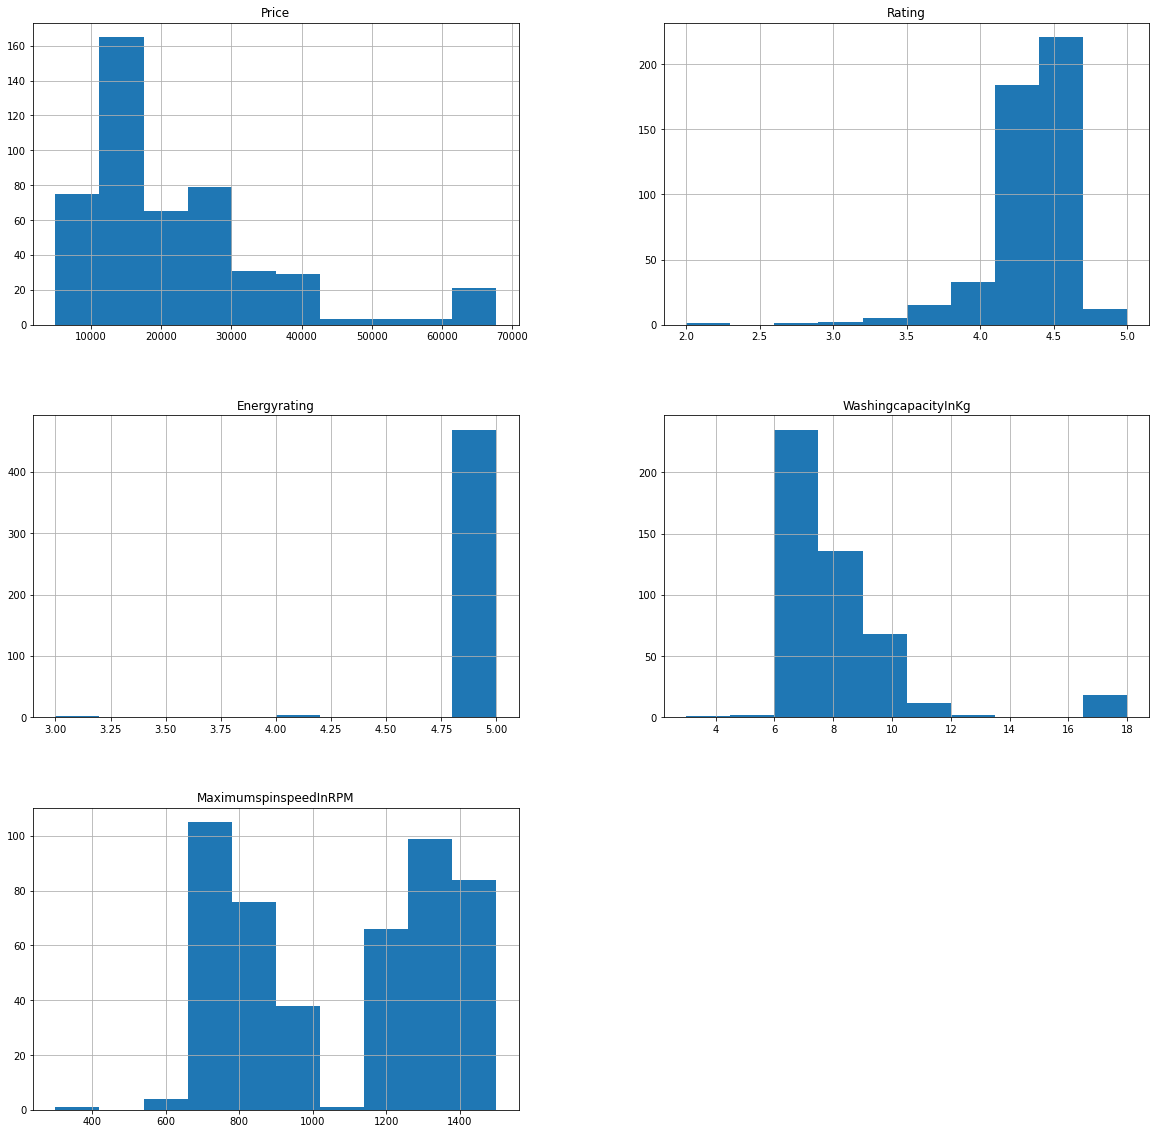

In [533]:
df_plot.hist(figsize = (20,20))
plt.show()

# Price vs Rating

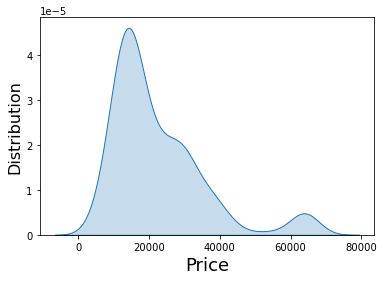

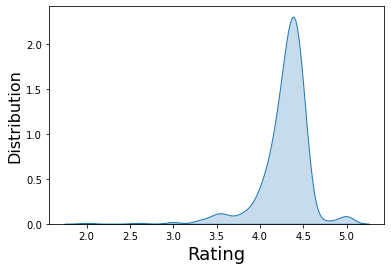

In [529]:
# Plot Distibution Plots of Price and Rating
columns=['Price','Rating']
for i in columns:
    sns.kdeplot(df_plot[i],shade=True)
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Distribution', fontsize=16)
    plt.show()

### Outliers in price

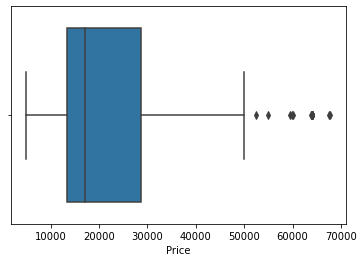

In [532]:
sns.boxplot(x = df_plot['Price'])
#df1.boxplot(colun='Price',grid=True,figsize=(6,4))
plt.show()

### Most of the ratings are given at 4 to 4.5 and the price range is 10K - 40K

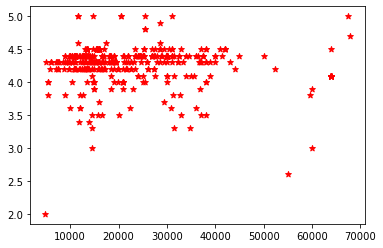

In [546]:
plt.scatter(df_plot['Price'],df_plot['Rating'],marker = "*", c = 'r')

<AxesSubplot:>

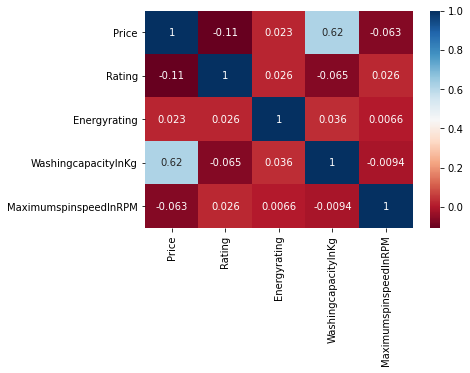

In [541]:
sns.heatmap(df_plot.corr(), annot = True, cmap ='RdBu')

## Price vs Automatic

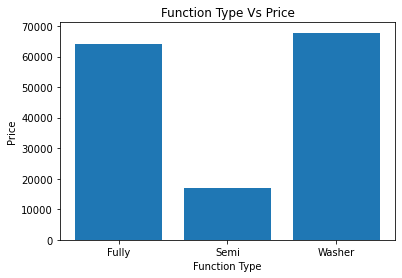

In [586]:
plt.bar(df_plot['Auto'],df_plot['Price'])
# Semi automatic are at the lower price range
plt.xlabel('Function Type')
plt.ylabel('Price')
plt.title('Function Type Vs Price')
plt.show()

## Brand vs Price

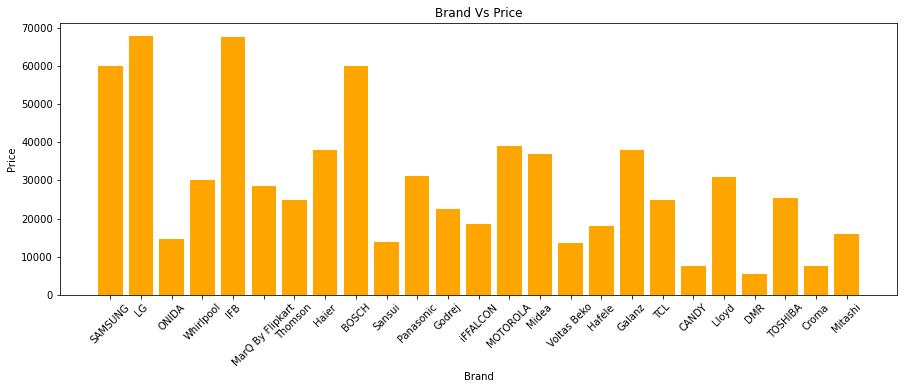

In [585]:
plt.figure(figsize=(15,5))
plt.bar(df_plot['Brand'],df_plot['Price'],color='orange')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Brand Vs Price')
plt.show()

## Price vs Washing Capacity in Kgs

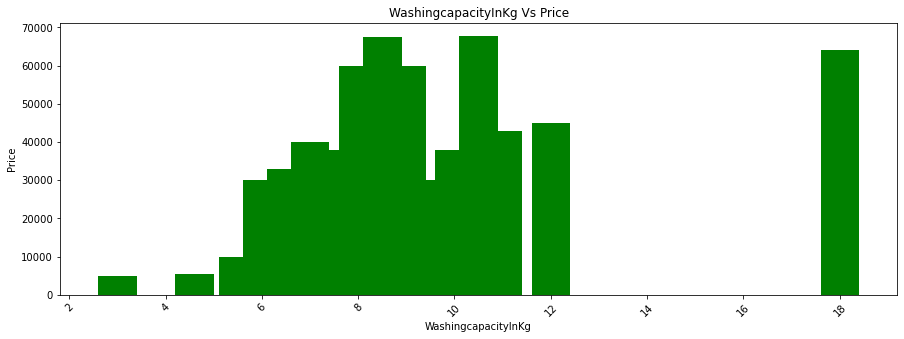

In [588]:
plt.figure(figsize=(15,5))
plt.bar(df_plot['WashingcapacityInKg'],df_plot['Price'],color='g')
plt.xticks(rotation=45)
plt.xlabel('WashingcapacityInKg')
plt.ylabel('Price')
plt.title('WashingcapacityInKg Vs Price')
plt.show()

## Price vs Maximum Spin speed in RPM

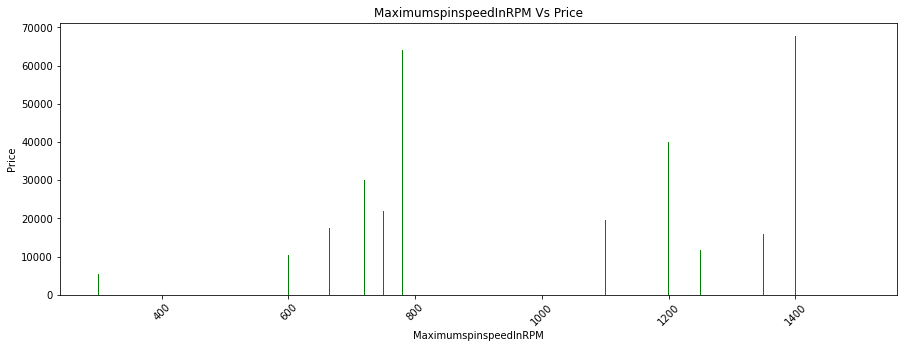

In [589]:
plt.figure(figsize=(15,5))
plt.bar(df_plot['MaximumspinspeedInRPM'],df_plot['Price'],color='g')
plt.xticks(rotation=45)
plt.xlabel('MaximumspinspeedInRPM')
plt.ylabel('Price')
plt.title('MaximumspinspeedInRPM Vs Price')
plt.show()

## Brand vs Rating

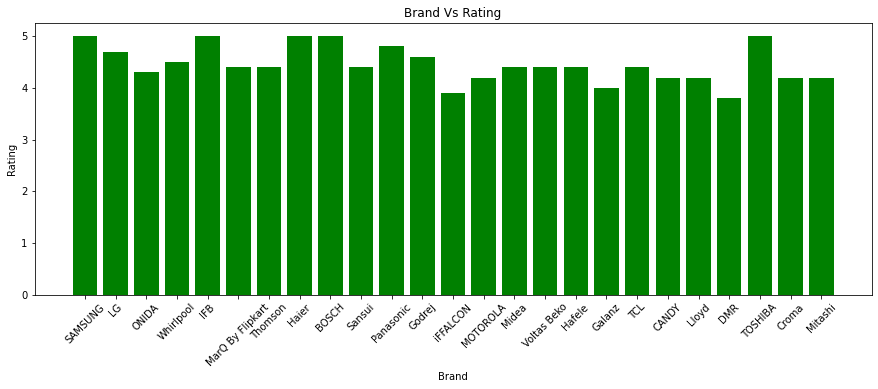

In [594]:
plt.figure(figsize=(15,5))
plt.bar(df_plot['Brand'],df_plot['Rating'],color='g')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.title('Brand Vs Rating')
plt.show()

### Pair Plot

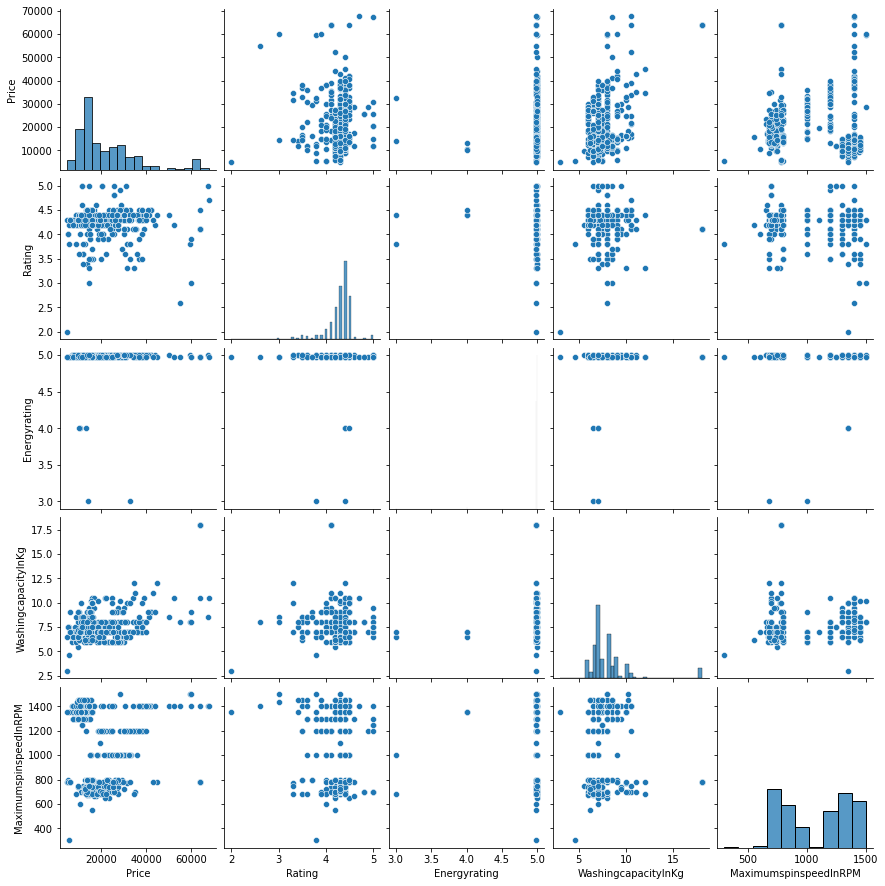

In [572]:
sns.pairplot(df_plot)

## Count plot

<AxesSubplot:ylabel='count'>

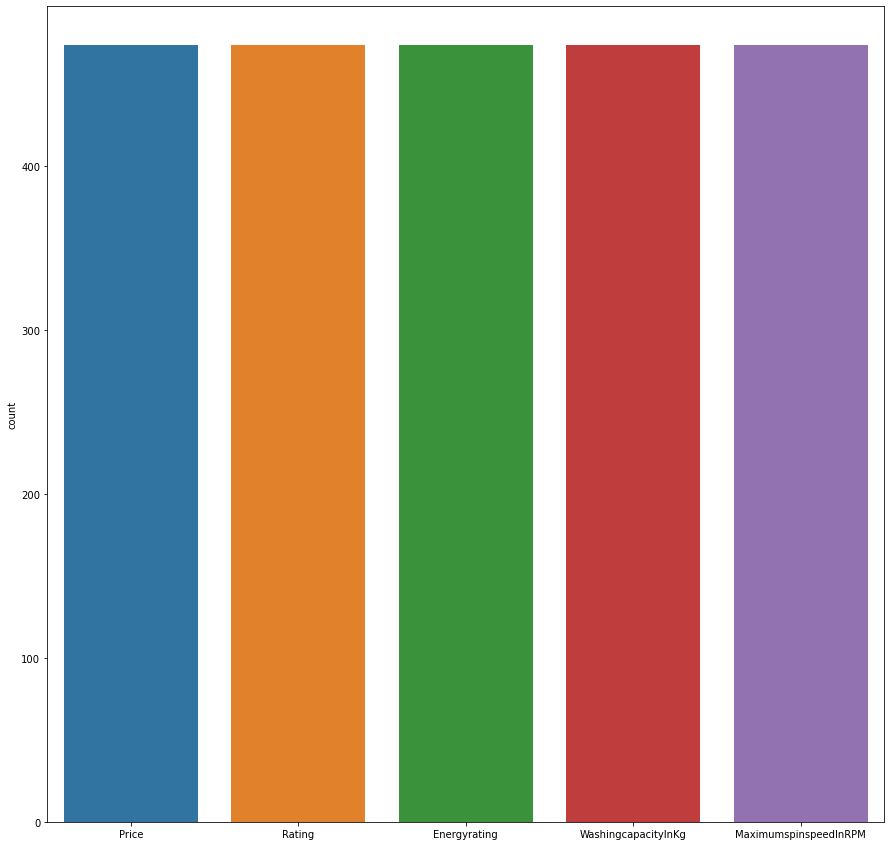

In [576]:
plt.figure(figsize= (15,15))
sns.countplot(data = df_plot)

# How many front, top load machines are available

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Load', ylabel='count'>

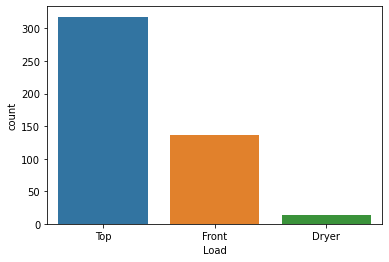

In [577]:
sns.countplot('Load', data = df_plot)

<AxesSubplot:xlabel='Price', ylabel='WashingcapacityInKg'>

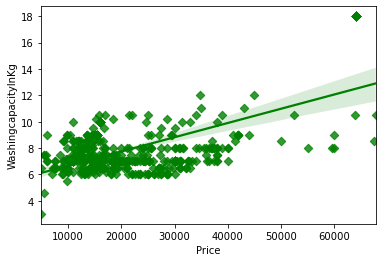

In [579]:
sns.regplot(x ='Price',y = 'WashingcapacityInKg', data=df_plot, color = 'green', marker = 'D')

# Thank you 